In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

In [4]:
data = pd.read_csv('/Users/frank.mancuso/Desktop/datasets/Car/train-data.csv')

In [5]:
#Preprocess data
print('Number of Samples: {}, number of attributes: {}'.format(data.shape[0], data.shape[1]))

Number of Samples: 6019, number of attributes: 14


In [6]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [7]:
data_clean = data.copy(deep = True)

In [8]:
data_clean.dropna("index").shape

(823, 14)

In [9]:
print("the number of NaN values in New_Price column is: " + str (data_clean.New_Price.isna().sum()))

the number of NaN values in New_Price column is: 5195


In [10]:
data_clean.drop(columns = ["Unnamed: 0", "New_Price"], inplace = True)

In [11]:
data_clean.dropna("index", inplace = True)
data_clean = data_clean.reset_index(drop = True)
data_clean.shape

(5975, 12)

In [12]:
len(np.unique(list(data_clean.Name)))

1855

In [14]:
# drop car model and only include car make to avoid overfitting 
names = list(data_clean.Name)
for i in range(len(names)):
    names[i] = names[i].split(' ', 1)[0]
data_clean.Name = names
data_clean.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [15]:
len(np.unique(list(data_clean.Name)))

31

In [16]:
#remove non numerical parts Mileage, Engine, Power columns
mileage = list(data_clean.Mileage)
engine = list(data_clean.Engine)
power = list(data_clean.Power)
for i in range(len(names)):
    mileage[i] = mileage[i].split(' ', 1)[0]
    engine[i] = engine[i].split(' ', 1)[0]
    power[i] = power[i].split(' ', 1)[0]
data_clean.Mileage = mileage
data_clean.Engine = engine
data_clean.Power = power
data_clean.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [17]:
#convert numerical data to numeric type
data_clean["Price"] = data_clean["Price"].astype(float)
data_clean["Kilometers_Driven"] = data_clean["Kilometers_Driven"].astype(float)
data_clean["Mileage"] = data_clean["Mileage"].astype(float)
data_clean["Engine"] = data_clean["Engine"].astype(float)

In [18]:
#Null Values in Power column
#delete these rows and then covert to numeric type
idx = []
lt = list(data_clean["Power"])
for i in range(len(lt)):   
    if( lt[i] == "null"):
        idx.append(i)
data_clean = data_clean.drop(idx)
data_clean = data_clean.reset_index(drop = True)

data_clean["Power"] = data_clean["Power"].astype(float)

In [19]:
data_clean.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [20]:
np.unique(list(data_clean.Name))

array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu',
       'Jaguar', 'Jeep', 'Lamborghini', 'Land', 'Mahindra', 'Maruti',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype='|S13')

In [21]:
np.unique(list(data_clean.Location))

array(['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
       'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'],
      dtype='|S10')

In [22]:
np.unique(list(data_clean.Year))

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [23]:
np.unique(list(data_clean.Fuel_Type))

array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype='|S6')

In [24]:
np.unique(list(data_clean.Transmission))

array(['Automatic', 'Manual'], dtype='|S9')

In [25]:
np.unique(list(data_clean.Owner_Type))

array(['First', 'Fourth & Above', 'Second', 'Third'], dtype='|S14')

In [26]:
np.unique(list(data_clean.Seats))

array([ 2.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [27]:
(data_clean.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [28]:
data_clean['Year'] = pd.Categorical(data_clean['Year'])
data_clean['Seats'] = pd.Categorical(data_clean['Seats'])

In [29]:
data_clean = pd.get_dummies(data_clean, prefix_sep='_', drop_first=True)

C:\Users\frank.mancuso\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


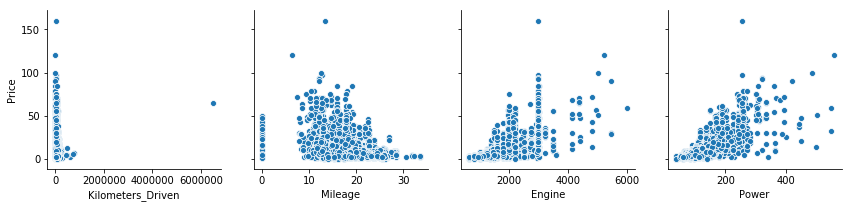

In [31]:
sns.pairplot(data=data_clean, x_vars=['Kilometers_Driven', 'Mileage', 'Engine', 'Power'], y_vars = 'Price', size=3)

In [32]:
#one noticable outlier KM +6000000
idx = []
lt = list(data_clean["Kilometers_Driven"])
for i in range(len(lt)):   
    if( lt[i] > 1000000):
        idx.append(i)
data_clean = data_clean.drop(idx)
data_clean = data_clean.reset_index(drop = True)

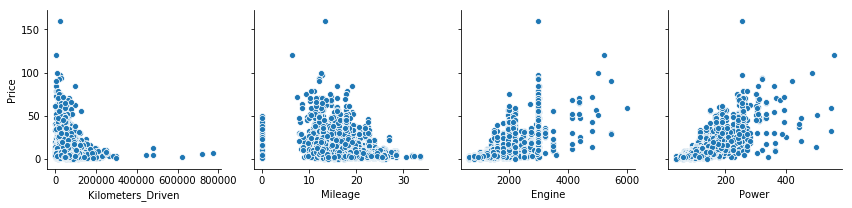

In [34]:
sns.pairplot(data=data_clean, x_vars=['Kilometers_Driven', 'Mileage', 'Engine', 'Power'], y_vars = 'Price', size=3)

In [35]:
#Linear Regression
#normalize training/test data

y = data_clean[["Price"]].to_numpy()
data_clean = data_clean.drop(columns = ["Price"])

In [36]:
x = data_clean.values
columns = data_clean.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_clean = pd.DataFrame(x_scaled)
data_clean.columns = columns

In [37]:
X = data_clean.to_numpy()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, test_size=0.15, random_state=1)

In [39]:
#Fit Model and check accuracy of training data
lm = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lm.fit(X_train, y_train)
print('Training accuracy (the coefficient of determination): {:.3f}'.format(lm.score(X_train, y_train)))

Training accuracy (the coefficient of determination): 0.799


In [40]:
#Test model on test data
prediction = lm.predict(X_test)

In [41]:
print('Testing accuracy by using score function: {:.3f}'.format(lm.score(X_test, y_test)))
print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, lm.predict(X_test))))

Testing accuracy by using score function: 0.790
Testing accuracy by using r2_score meric: 0.790


In [42]:
mean_absolute_error(y_test, prediction)

2.7797622196502947

In [ ]:
#on average model will misprice a car by around 2.77